Broad Question #2:
    We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.  
Question: Can experience, gender, and subscription status predict hours played (as ranges of time) in player.csv? 

Since the broad question asks to predict "large amounts" of data instead if an exact numeric value, and the amount of data collected in the study is directly related to the amount of active time a user plays, the `played_hours` variable segmented into factors of time intervals is a good approach to classifying large and not large amounts of data being contributed.   

The time intervals will be assigned as follows (powers of 5):  
`played_hours` < 1 =  minimal  
1 <= `player_hours` < 5 = low  
5 <= `played_hours` < 25 = moderate  
25 <= `played_hours` < 125 = high  
125 <= `played_hours` = very_high

The `player.csv`  dataset contains information describing the users. It is contains 196 observations (users) and 7 variables about them. 
<br>Those variables are:
- `experience` -- character, self identified level of experience
- `subscribe` -- logical, whether the user is subscribed to the blog
- `hashedEmail` -- character, hashed form of user email
- `played_hours` -- double, total time in hours a user has been on the server
- `name` -- character, user name
- `gender` -- character, user gender
- `Age` -- double, user age.
<br>There does not appear to be any issues with the data itself, however the way in which `plaicraft.ai` operates in regards to allotted time could skew the amount of time a user is online. For instance, if there was no one else online for them to talk with, which would  the time they have access to.

In [32]:
library(tidyverse)
library(repr)

player_url <- "https://raw.githubusercontent.com/n-b-t/DSCI-100-Project-individual-/refs/heads/main/data/players.csv"
player_data <- read_csv(player_url)

player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [22]:
player_data_mean <- player_data |>
                    select(played_hours, Age) |>
                    summarise(mean_played_hours = round(mean(played_hours, na.rm = TRUE),2), 
                              mean_Age = round(mean(Age, na.rm = TRUE),2))
player_data_mean

mean_played_hours,mean_Age
<dbl>,<dbl>
5.85,21.14


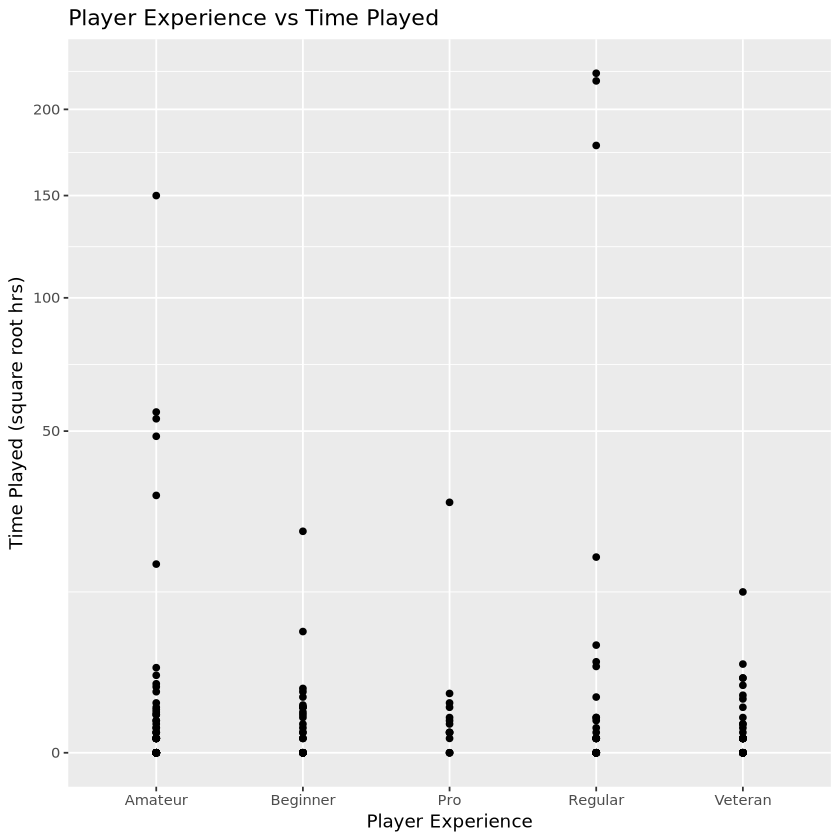

In [29]:
experience_plot <- player_data |>
                    ggplot(aes(x = experience, played_hours)) +
                    geom_point() +
                    labs(x = "Player Experience", y = "Time Played (square root hrs)",
                         title = "Player Experience vs Time Played") +
                    theme(text = element_text(30)) +
                    scale_y_sqrt()
experience_plot

In the *Player Experience vs Time Played* graph, "Regular" and "Amateur" levels of experience have the highest data contributions, but those users appear to be outliers. Overall, the experience level does not seem to be a very strong indicator of data contribution.

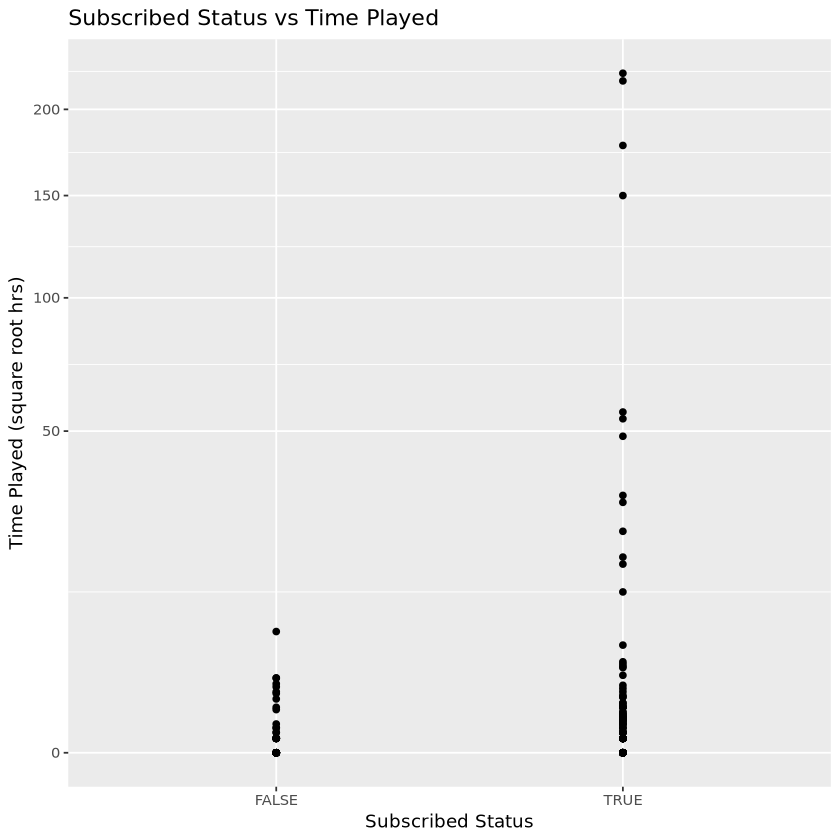

In [30]:
subscription_plot <-  player_data |>
                    ggplot(aes(x = subscribe, played_hours)) +
                    geom_point() +
                    labs(x = "Subscribed Status", y = "Time Played (square root hrs)",
                         title = "Subscribed Status vs Time Played") +
                    theme(text = element_text(30)) +
                    scale_y_sqrt()
subscription_plot

Based on the *Subscribed Status vs Time Played* graph, subcribing to the blog appears to have some correlation to a user contributing a greater amount of data since the users with the greatest contributions are subscribed.

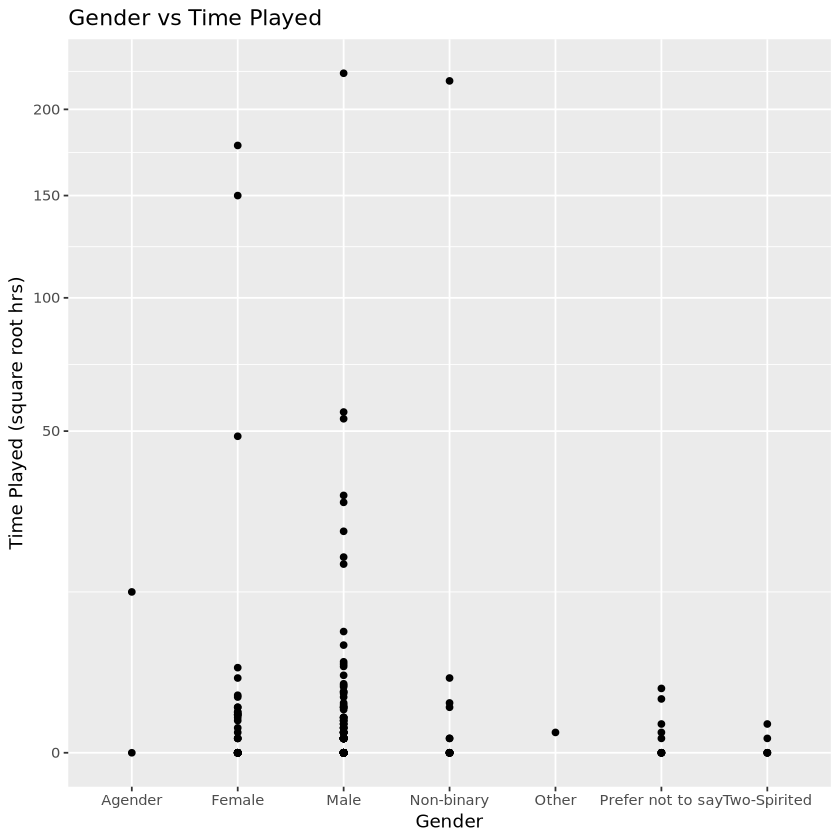

In [31]:
gender_plot <-  player_data |>
                    ggplot(aes(x = gender, played_hours)) +
                    geom_point() +
                    labs(x = "Gender", y = "Time Played (square root hrs)",
                         title = "Gender vs Time Played") +
                    theme(text = element_text(30)) +
                    scale_y_sqrt()
gender_plot

"Male" seems to have the largest representation as well as the greatest contribution from a single user in the *Gender vs Time Played* graph. Due to it having the largest representation and covering a sizable range, it may not be the best predictor of contribution.